In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
Data = pd.read_csv("./Datasets/banknote/data_banknote_authentication.csv")

In [3]:
Data = Data.to_numpy()

In [4]:
m, n = Data.shape
n0 = n-1 #number of input features

In [5]:
#randomly shuffling data because dataset is divided in two halves according to labels
randseq = np.random.permutation(m)
Data = Data[randseq[0:m], 0:n]

In [6]:
import math
train_num = math.floor(m*0.8)
test_num = m - train_num 

In [7]:
x_train = torch.tensor(Data[0:train_num, 0:n0], dtype=torch.float32) #pytorch models expect input models to be in float32
y_train = torch.tensor(Data[0:train_num, n0], dtype=torch.float32).unsqueeze(1)

x_test = torch.tensor(Data[train_num+1:m, 0:n0], dtype=torch.float32)
y_test = torch.tensor(Data[train_num+1:m, n0], dtype=torch.float32).unsqueeze(1)

In [11]:
class TabularNN(nn.Module):
    def __init__(self):

        super(TabularNN, self).__init__()
        self.fc1 = nn.Linear(4, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1) # nn 4->5->5->1
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)

        x = self.fc2(x)
        x = torch.sigmoid(x)

        x = self.fc3(x)
        x = torch.sigmoid(x)

        return x



In [12]:
model = TabularNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [14]:
epochs = 200

train_loss = np.zeros((epochs, 1))
train_accuracy = np.zeros((epochs, 1))

for epoch in range(epochs):
    y_pred = model(x_train)

    pred_train = (y_pred > 0.5).float()
    train_accuracy[epoch] = 1 - torch.sum(abs(pred_train - y_train))/train_num

    loss = criterion(y_pred, y_train)
    train_loss[epoch] = loss.item()

    print(f"Epoch : {epoch+1}, Loss : {train_loss[epoch]}, Accuracy : {train_accuracy}")

    #for backward prop
    optimizer.zero_grad() #clears the gradients of model params to zero before computing new gradients
    loss.backward() #computes gradients wrt model params
    optimizer.step() #updates model params


Epoch : 1, Loss : [0.81533933], Accuracy : [[0.4402917]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.    

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_60319/1578535860.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_accuracy[epoch] = 1 - torch.sum(abs(pred_train - y_train))/train_num


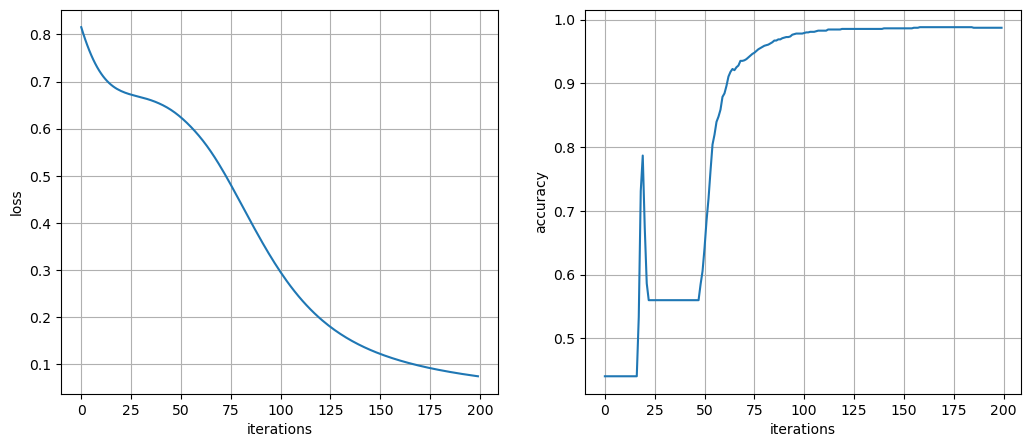

In [15]:
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('accuracy')

plt.subplots_adjust(left = 0, 
                    bottom=0.1,
                    right = 1.5, 
                    top = 0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

In [16]:
y_test_pred = model(x_test)

pred_test = (y_test_pred > 0.5).float()

test_accuracy = 1 - torch.sum(abs(y_test_pred - y_test))/test_num

print(test_accuracy)

tensor(0.9430, grad_fn=<RsubBackward1>)
